## Chapter 2. Data and Sampling Distributions

In this chapter the author shows the misconception holds that the era of big data means the end of a need for sampling.<br>
Starting by explaining random and bias sampling, bias effects and sampling techniques.<br>
Showing the power of bootstrap and how we can use to estimate sampling distribution of a statistic or of model parameters and how much we are confidence that the real statistic will be in this sample distribution.<br>
At the end shows the popular distributions.

Import required packages`

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

Define Data Path

In [3]:
BREAST_CANCER = 'data/mine/breast_cancer.csv'
HEART_FAILURE = 'data/mine/heart_failure.csv'
MEDICAL_INSURANCE = 'data/mine/insurance.csv'
TELCO_CUST_CHURN = 'data/mine/telco-churn.csv'

In [4]:
#changing the plotting style
plt.style.use('fivethirtyeight')

In [6]:
insurance_df = pd.read_csv(MEDICAL_INSURANCE)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Medical Insurance Charges')

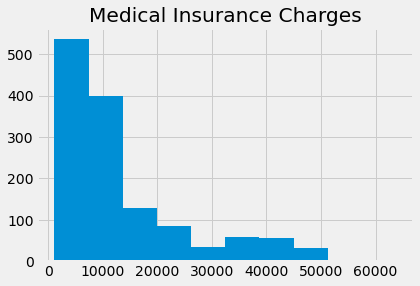

In [8]:
plt.hist(insurance_df['charges'])
plt.title('Medical Insurance Charges')

In [9]:
print(insurance_df.shape)

(1338, 7)


In [57]:
sampled_data = pd.DataFrame({
    'charges' : insurance_df['charges'].sample(500),
})
sample_mean_10 =pd.DataFrame({
    'charges' : [insurance_df['charges'].sample(10).mean() for _ in range(500)],
})
sample_mean_25 = pd.DataFrame({
    'charges' : [insurance_df['charges'].sample(25).mean() for _ in range(500)],
})

<ipython-input-59-8235267d2e76>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


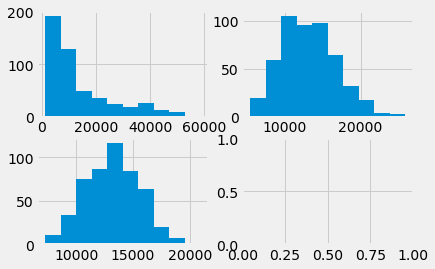

In [59]:
fig ,ax = plt.subplots(2,2)
ax[0][0].hist(sampled_data)
ax[0][1].hist(sample_mean_10)
ax[1][0].hist(sample_mean_25)
fig.show()

## The Bootstrap

In [70]:
results = [resample(insurance_df['charges']).median() for _ in range(1000)]
results = pd.Series(results)
print('Bootstrap Statistics:')
print('original: ',insurance_df['charges'].median())
print('bias: ', results.mean() - insurance_df['charges'].median())
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original:  9382.033
bias:  -25.53184230000261
std. error: 280.64493992167195
